# Undirected Hamiltonian paths on the k X n knight graph

<h3 style="color:#CD5C5C;background:white; line-height: 150%;border-top: thick solid #CD5C5C; float: left; width: 100%; margin-top: 1em;">
Peter Luschny - November 2025

This *SageMath* notebook illustrates Hamiltonian paths of a knight on small chessboards. A Hamiltonian path visits each square exactly once. See https://oeis.org/A390833 for more information.

In [1]:
from sage.plot.graphics import Graphics
from sage.plot.arrow import arrow
from sage.plot.text import text
from sage.plot.polygon import polygon
from matplotlib.ticker import FuncFormatter

def draw_knight_tour(k, n, path, square_size=1, label_moves=False):
    """
    Draw a knight tour on a k X n chessboard.
    path: list of strings like 'a1', 'c2', ...
    Returns: (Graphics, x_pos, y_pos, x_formatter, y_formatter)
    """
    G = Graphics()

    # Board squares
    for i in range(k):
        for j in range(n):
            color = 'lightgray' if (i + j) % 2 == 0 else 'white'
            G += polygon([(i*square_size, j*square_size),
                          ((i+1)*square_size, j*square_size),
                          ((i+1)*square_size, (j+1)*square_size),
                          (i*square_size, (j+1)*square_size)],
                         color=color, edgecolor='black')

    # Algebraic -> center coordinates
    def square_to_coord(s):
        file = ord(s[0]) - ord('a')     # 0..k-1
        rank = int(s[1:]) - 1           # 0..n-1
        return (file + 0.5, rank + 0.5)

    coords = [square_to_coord(s) for s in path]

    # Path arrows
    for (x1, y1), (x2, y2) in zip(coords, coords[1:]):
        G += arrow((x1, y1), (x2, y2), arrowsize=0.25, color='red', width=1.5)

    # Labels inside squares
    if label_moves:
        for idx, (x, y) in enumerate(coords, start=1):
            G += text(str(idx), (x, y), color='blue', fontsize=9,
                      horizontal_alignment='center', vertical_alignment='center')
    else:
        for s in path:
            x, y = square_to_coord(s)
            G += text(s, (x, y), color='blue', fontsize=8,
                      horizontal_alignment='center', vertical_alignment='center')

    # Tick positions centered on squares
    x_pos = [i + 0.5 for i in range(k)]
    y_pos = [j + 0.5 for j in range(n)]

    # Formatters mapping positions -> algebraic labels
    def fx(val, pos=None):
        i = int(round(val - 0.5))
        return chr(ord('a') + i) if 0 <= i < k else ""

    def fy(val, pos=None):
        j = int(round(val - 0.5))
        return str(j + 1) if 0 <= j < n else ""

    x_formatter = FuncFormatter(fx)
    y_formatter = FuncFormatter(fy)

    return G, x_pos, y_pos, x_formatter, y_formatter

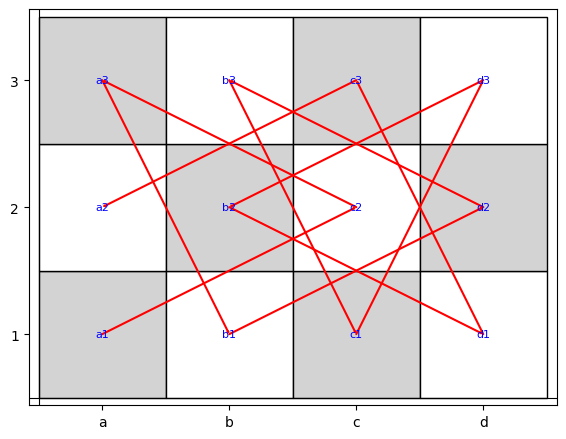

In [2]:
# 3×4 board tour (files a..d, ranks 1..3)
path_3x4 = ["a1","c2","a3","b1","d2","b3","c1","d3","b2","d1","c3","a2"]
G, x_pos, y_pos, xfmt, yfmt = draw_knight_tour(4, 3, path_3x4)
G.show(figsize=6,
       xmin=0, xmax=4, ymin=0, ymax=3,
       axes=True, frame=True,
       ticks=[x_pos, y_pos],
       tick_formatter=[xfmt, yfmt])

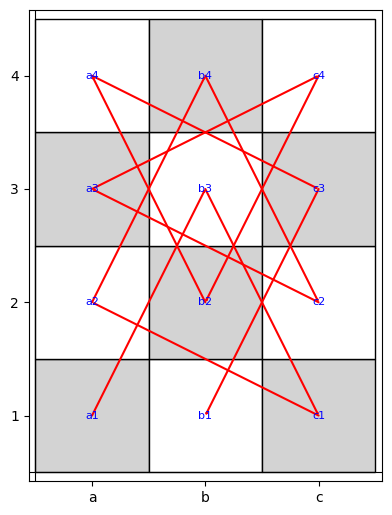

In [3]:
# 4×3 board tour (files a..c, ranks 1..4)
path_4x3 = ["a1","b3","c1","a2","b4","c2","a3","c4","b2","a4","c3","b1"]
G2, x_pos2, y_pos2, xfmt2, yfmt2 = draw_knight_tour(3, 4, path_4x3)
G2.show(figsize=7,
        xmin=0, xmax=3, ymin=0, ymax=4,
        axes=True, frame=True,
        ticks=[x_pos2, y_pos2],
        tick_formatter=[xfmt2, yfmt2])

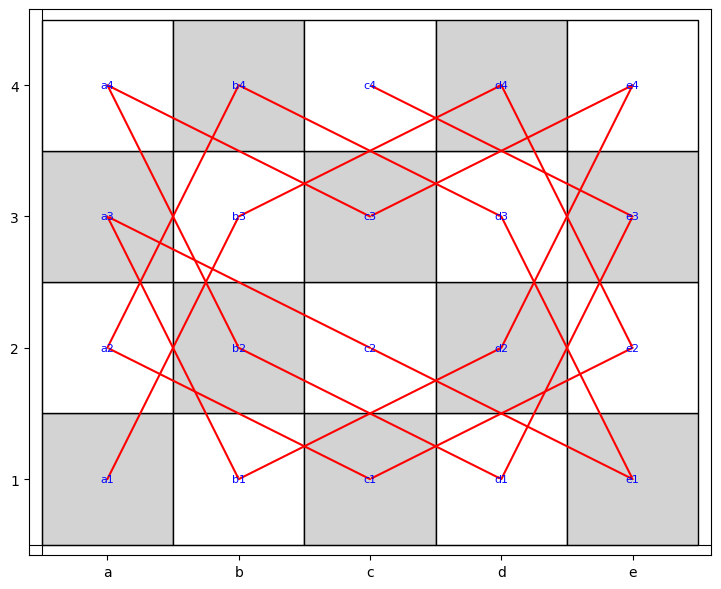

In [5]:
path_5x4 = ["a1", "b3", "d4", "e2", "c1", "a2", "b4", "d3", "e1", "c2",
"a3", "b1", "d2", "e4", "c3", "a4", "b2", "d1", "e3", "c4"]
G, x_pos, y_pos, x_fmt, y_fmt = draw_knight_tour(5, 4, path_5x4)
G.show(figsize=8,
       xmin=0, xmax=5, ymin=0, ymax=4,
       axes=True, frame=True,
       ticks=[x_pos, y_pos],
       tick_formatter=[x_fmt, y_fmt])

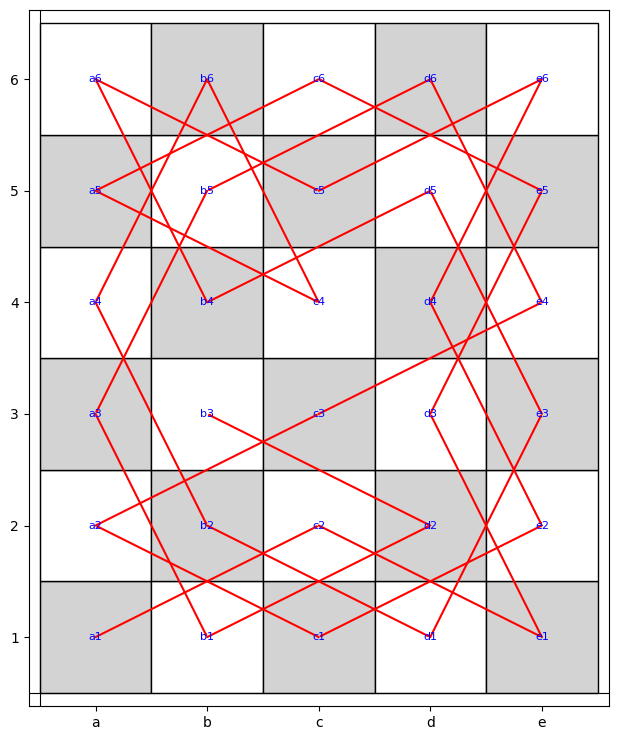

In [9]:
path_5x6 = ["a1", "c2", "e1", "d3", "e5", "c6", "a5", "c4", "b6", "a4",
"b2", "d1", "e3", "d5", "b4", "a6", "c5", "e6", "d4", "e2",
"c1", "a2", "c3", "e4", "d6", "b5", "a3", "b1", "d2", "b3"]
G, x_pos, y_pos, x_fmt, y_fmt = draw_knight_tour(5, 6, path_5x6)
G.show(figsize=10,
       xmin=0, xmax=5, ymin=0, ymax=6,
       axes=True, frame=True,
       ticks=[x_pos, y_pos],
       tick_formatter=[x_fmt, y_fmt])